# 1. 라이브러리 선언하기

In [1]:
import pandas as pd
import numpy as np

# 2. 데이터 불러오기

In [2]:
selloutData = pd.read_csv("../dataset/kopo_channel_seasonality_new.csv")
selloutData.describe() #숫자형 데이터에 대한 기본 통계량을 만들어줌
selloutData

,REGIONID,PRODUCT,YEARWEEK,QTY
0,A60,PRODUCT4,201402,71.0
1,A60,PRODUCT59,201402,22275.0
2,A60,PRODUCT34,201402,4463.0
3,A60,PRODUCT47,201402,0.0
4,A60,PRODUCT56,201402,23.0
...,...,...,...,...
124653,A10,PRODUCT60,201630,824.0
124654,A10,PRODUCT56,201630,275.0
124655,A10,PRODUCT61,201630,0.0
124656,A10,PRODUCT12,201630,15021.0


# [데이터타입통합]kopo_channel_seasonality_new.csv 파일을불러온후selloutData 변수에담으세요
# 이후QTY컬럼→실수(float), 이외컬럼→문자(str)로변경하세요

In [3]:
selloutDataType = selloutData.astype({"REGIONID":str, # 컬럼의 자료형을 원하는 형태로 바꿔줌
              "PRODUCT":str,
              "YEARWEEK":str,
                   "QTY":float})
selloutDataType.dtypes

REGIONID     object
PRODUCT      object
YEARWEEK     object
QTY         float64
dtype: object

In [4]:
selloutData.dtypes

REGIONID     object
PRODUCT      object
YEARWEEK      int64
QTY         float64
dtype: object

# [데이터타입 조회] kopo_customerdata.csv 파일을 불러온 후
# kopo_customerData 변수에 담으세요 이후 STATENAME, GENDER 컬럼 첫 5개행 조회하세요

In [5]:
kopo_customerData = pd.read_csv("../dataset/kopo_customerdata.csv")
# csv파일을 kopo_customerData변수에 담음

findColumn = ['STATENAME', 'GENDER']
# 조회할 컬럼이름을 리스트로 정의

kopo_customerData.loc[0:4,findColumn]
# findColumn에 해당하는 컬럼에서 5개의 행만을 추출함


,STATENAME,GENDER
0,State2,Male
1,State2,Male
2,State2,Female
3,State2,Male
4,State2,Male


# [불량 데이터 처리]
# kopo_channel_seasonality_new.csv 자료를 담은 selloutData 변수에서 QTY컬럼 음수(반품)인 경우 0, 
# 양수인 경우 기존 QTY 값 유지하는 로직을 적용하여 QTY_NEW 컬럼을 추가하세요

In [6]:
selloutData = pd.read_csv("../dataset/kopo_channel_seasonality_new.csv")
selloutData

,REGIONID,PRODUCT,YEARWEEK,QTY
0,A60,PRODUCT4,201402,71.0
1,A60,PRODUCT59,201402,22275.0
2,A60,PRODUCT34,201402,4463.0
3,A60,PRODUCT47,201402,0.0
4,A60,PRODUCT56,201402,23.0
...,...,...,...,...
124653,A10,PRODUCT60,201630,824.0
124654,A10,PRODUCT56,201630,275.0
124655,A10,PRODUCT61,201630,0.0
124656,A10,PRODUCT12,201630,15021.0


In [7]:
selloutData["QTY_NEW"] = np.where(selloutData.QTY < 0, 0, selloutData.QTY)

In [8]:
selloutData

,REGIONID,PRODUCT,YEARWEEK,QTY,QTY_NEW
0,A60,PRODUCT4,201402,71.0,71.0
1,A60,PRODUCT59,201402,22275.0,22275.0
2,A60,PRODUCT34,201402,4463.0,4463.0
3,A60,PRODUCT47,201402,0.0,0.0
4,A60,PRODUCT56,201402,23.0,23.0
...,...,...,...,...,...
124653,A10,PRODUCT60,201630,824.0,824.0
124654,A10,PRODUCT56,201630,275.0,275.0
124655,A10,PRODUCT61,201630,0.0,0.0
124656,A10,PRODUCT12,201630,15021.0,15021.0


# [데이터 통합]
# selloutData 자료에서
# YEAR, WEEK 컬럼을 생성하고 WEEK 가 52 이하인
# 데이터만 조회한 후 refinedSelloutData 변수에 담으세요


In [9]:
selloutData

,REGIONID,PRODUCT,YEARWEEK,QTY,QTY_NEW
0,A60,PRODUCT4,201402,71.0,71.0
1,A60,PRODUCT59,201402,22275.0,22275.0
2,A60,PRODUCT34,201402,4463.0,4463.0
3,A60,PRODUCT47,201402,0.0,0.0
4,A60,PRODUCT56,201402,23.0,23.0
...,...,...,...,...,...
124653,A10,PRODUCT60,201630,824.0,824.0
124654,A10,PRODUCT56,201630,275.0,275.0
124655,A10,PRODUCT61,201630,0.0,0.0
124656,A10,PRODUCT12,201630,15021.0,15021.0


In [10]:
selloutData.dtypes

REGIONID     object
PRODUCT      object
YEARWEEK      int64
QTY         float64
QTY_NEW     float64
dtype: object

In [11]:
# selloutData["YEAR"]=selloutData.YEARWEEK // 100
# selloutData["WEEK"]=selloutData.YEARWEEK % 100
# refinedSelloutData = selloutData.loc[selloutData.WEEK <= 52]
# refinedSelloutData

In [12]:
selloutData = selloutData.astype({"REGIONID":str, # 데이터프레임의 모든 열을 문자열로 바꿔줌
              "PRODUCT":str,
              "YEARWEEK":str,
              "QTY":float})
selloutData.dtypes

REGIONID     object
PRODUCT      object
YEARWEEK     object
QTY         float64
QTY_NEW     float64
dtype: object

In [13]:
selloutData["YEAR"]=selloutData.YEARWEEK.str[0:4] #YEARWEEK의 값 중 0번째 인덱스부터 3번째 인덱스까지의 문자를 YEAR에 넣어줌
selloutData["WEEK"]=selloutData.YEARWEEK.str[4:6] #YEARWEEK의 값 중 4번째 인덱스부터 5번째 인덱스까지의 문자를 WEEK에 넣어줌
refinedSelloutData = selloutData.loc[selloutData.WEEK.astype(int) <= 52]
refinedSelloutData

,REGIONID,PRODUCT,YEARWEEK,QTY,QTY_NEW,YEAR,WEEK
0,A60,PRODUCT4,201402,71.0,71.0,2014,02
1,A60,PRODUCT59,201402,22275.0,22275.0,2014,02
2,A60,PRODUCT34,201402,4463.0,4463.0,2014,02
3,A60,PRODUCT47,201402,0.0,0.0,2014,02
4,A60,PRODUCT56,201402,23.0,23.0,2014,02
...,...,...,...,...,...,...,...
124653,A10,PRODUCT60,201630,824.0,824.0,2016,30
124654,A10,PRODUCT56,201630,275.0,275.0,2016,30
124655,A10,PRODUCT61,201630,0.0,0.0,2016,30
124656,A10,PRODUCT12,201630,15021.0,15021.0,2016,30


# refinedSelloutData에서 → 지역, 상품, 연주차 컬럼 순으로
# 오름차순 정렬하여 sortedData 변수에 담으세요

In [14]:
ascColumn = ["REGIONID","PRODUCT","YEARWEEK"]

In [15]:
sortedData = refinedSelloutData.sort_values(by=ascColumn)
sortedData

,REGIONID,PRODUCT,YEARWEEK,QTY,QTY_NEW,YEAR,WEEK
298,A00,PRODUCT34,201401,661.0,661.0,2014,01
1757,A00,PRODUCT34,201402,679.0,679.0,2014,02
3125,A00,PRODUCT34,201403,578.0,578.0,2014,03
205,A00,PRODUCT34,201404,532.0,532.0,2014,04
4369,A00,PRODUCT34,201405,516.0,516.0,2014,05
...,...,...,...,...,...,...,...
102292,A77,PRODUCT12,201648,4152.0,4152.0,2016,48
97525,A77,PRODUCT12,201649,5086.0,5086.0,2016,49
102329,A77,PRODUCT12,201650,5846.0,5846.0,2016,50
101211,A77,PRODUCT12,201651,4933.0,4933.0,2016,51


# [지역, 상품, 연도별집계]
# sortedData 에서 지역, 상품, 연도단위 판매량(QTY_NEW)의 평균 연산 후 groupData 변수에 담으세요 
# 이후 컬럼명을 QTY_MEAN로 변경하세요

In [16]:
RegProYear = ["REGIONID","PRODUCT","YEAR"] # 지역, 상품, 연 컬럼을 지정

In [17]:
sortedGroup = sortedData.groupby(by=RegProYear)[["QTY_NEW"]].agg(["mean"]).reset_index()
# 지역, 상품, 연 컬럼을 기준으로 "QTY_NEW"의 평균을 집계하여 sortedGroup에 담고 인덱스를 초기화함
groupData=sortedGroup.rename(columns = {'mean':""})
# 컬럼이름 "mean"을 제거해줌

In [18]:
groupData

,REGIONID,PRODUCT,YEAR,QTY_NEW
,,,,
0,A00,PRODUCT34,2014,275.961538
1,A00,PRODUCT34,2015,86.634615
2,A00,PRODUCT34,2016,36.576923
3,A00,PRODUCT58,2014,2.673077
4,A00,PRODUCT58,2015,5.711538
...,...,...,...,...
2377,A77,PRODUCT1,2015,3030.019231
2378,A77,PRODUCT1,2016,3375.326923
2379,A77,PRODUCT12,2014,2035.788462


In [19]:
# groupData.sort_values(by = "QTY_NEW",ascending=False)
# 제품판매량을 많이 팔린 순으로 출력하여 어느 지역에서 어떤 제품이 어떤 년도에 잘 팔렸는지 확인 가능

In [20]:
sortedData["MA5_BASIC"] = sortedData.QTY.rolling(window=5
                                                 ,center=True,min_periods = 1).mean()
# 범위는 5, 최소구간 2, 기준점을 설정하지 않은 QTY의 이동 구간 평균값을 MA5_BASIC 컬럼으로 새로 만들어서 추가하라

In [21]:
sortedData["EFFECT"] = sortedData.QTY / sortedData.MA5_BASIC

In [22]:
sortedData

,REGIONID,PRODUCT,YEARWEEK,QTY,QTY_NEW,YEAR,WEEK,MA5_BASIC,EFFECT
298,A00,PRODUCT34,201401,661.0,661.0,2014,01,639.333333,1.033889
1757,A00,PRODUCT34,201402,679.0,679.0,2014,02,612.500000,1.108571
3125,A00,PRODUCT34,201403,578.0,578.0,2014,03,593.200000,0.974376
205,A00,PRODUCT34,201404,532.0,532.0,2014,04,545.600000,0.975073
4369,A00,PRODUCT34,201405,516.0,516.0,2014,05,491.200000,1.050489
...,...,...,...,...,...,...,...,...,...
102292,A77,PRODUCT12,201648,4152.0,4152.0,2016,48,4582.600000,0.906036
97525,A77,PRODUCT12,201649,5086.0,5086.0,2016,49,4718.200000,1.077953
102329,A77,PRODUCT12,201650,5846.0,5846.0,2016,50,5513.600000,1.060287
101211,A77,PRODUCT12,201651,4933.0,4933.0,2016,51,5854.000000,0.842672


In [23]:
sortedData.YEAR.drop_duplicates() # sortedData 데이터프레임의 중복되는 YEAR 컬럼값을 제거함

298      2014
40331    2015
83502    2016
Name: YEAR, dtype: object

In [24]:
# 3개 연도의 지역, 상품, 주차별 평균 EFFECT 구하기

In [25]:
sortedData

,REGIONID,PRODUCT,YEARWEEK,QTY,QTY_NEW,YEAR,WEEK,MA5_BASIC,EFFECT
298,A00,PRODUCT34,201401,661.0,661.0,2014,01,639.333333,1.033889
1757,A00,PRODUCT34,201402,679.0,679.0,2014,02,612.500000,1.108571
3125,A00,PRODUCT34,201403,578.0,578.0,2014,03,593.200000,0.974376
205,A00,PRODUCT34,201404,532.0,532.0,2014,04,545.600000,0.975073
4369,A00,PRODUCT34,201405,516.0,516.0,2014,05,491.200000,1.050489
...,...,...,...,...,...,...,...,...,...
102292,A77,PRODUCT12,201648,4152.0,4152.0,2016,48,4582.600000,0.906036
97525,A77,PRODUCT12,201649,5086.0,5086.0,2016,49,4718.200000,1.077953
102329,A77,PRODUCT12,201650,5846.0,5846.0,2016,50,5513.600000,1.060287
101211,A77,PRODUCT12,201651,4933.0,4933.0,2016,51,5854.000000,0.842672


In [26]:
groupKey = ["REGIONID","PRODUCT","WEEK"]
ratioData = sortedData.groupby(groupKey)[["EFFECT"]].agg("mean").reset_index()

In [27]:
kopoData = pd.read_csv("../dataset/kopo_product_volume.csv")

In [28]:
kopoDataA01 = kopoData.loc[kopoData.PRODUCTGROUP == "ST0001"]

In [29]:
kopoDataA01

,REGIONID,PRODUCTGROUP,YEARWEEK,VOLUME
0,A01,ST0001,201415,810144
2,A01,ST0001,201418,671464
4,A01,ST0001,201413,470040
6,A01,ST0001,201411,524787
8,A01,ST0001,201416,764927
...,...,...,...,...
255,A01,ST0001,201609,635412
256,A01,ST0001,201616,658270
259,A01,ST0001,201614,739977
261,A01,ST0001,201641,746061


In [30]:
sortKey = ["REGIONID", "PRODUCTGROUP", "YEARWEEK"]

In [31]:
kopoSortedData = kopoDataA01.sort_values(sortKey, ignore_index=True)
kopoSortedData.head()

,REGIONID,PRODUCTGROUP,YEARWEEK,VOLUME
0,A01,ST0001,201401,513598
1,A01,ST0001,201402,438251
2,A01,ST0001,201403,420290
3,A01,ST0001,201404,458431
4,A01,ST0001,201405,482381


# refinedSelloutData와 groupData를 [REGIONID, PRODUCT, YEAR] 키로 조인하여 mergedData 변수에 아래와 같이 담으세요

In [32]:
refinedSelloutData

,REGIONID,PRODUCT,YEARWEEK,QTY,QTY_NEW,YEAR,WEEK
0,A60,PRODUCT4,201402,71.0,71.0,2014,02
1,A60,PRODUCT59,201402,22275.0,22275.0,2014,02
2,A60,PRODUCT34,201402,4463.0,4463.0,2014,02
3,A60,PRODUCT47,201402,0.0,0.0,2014,02
4,A60,PRODUCT56,201402,23.0,23.0,2014,02
...,...,...,...,...,...,...,...
124653,A10,PRODUCT60,201630,824.0,824.0,2016,30
124654,A10,PRODUCT56,201630,275.0,275.0,2016,30
124655,A10,PRODUCT61,201630,0.0,0.0,2016,30
124656,A10,PRODUCT12,201630,15021.0,15021.0,2016,30


In [33]:
groupData

,REGIONID,PRODUCT,YEAR,QTY_NEW
,,,,
0,A00,PRODUCT34,2014,275.961538
1,A00,PRODUCT34,2015,86.634615
2,A00,PRODUCT34,2016,36.576923
3,A00,PRODUCT58,2014,2.673077
4,A00,PRODUCT58,2015,5.711538
...,...,...,...,...
2377,A77,PRODUCT1,2015,3030.019231
2378,A77,PRODUCT1,2016,3375.326923
2379,A77,PRODUCT12,2014,2035.788462


# ../dataset/feature_regression_example.csv
# 데이터를 활용하여 2015년도 자료만 활용하여 x축: week, y축: qty를 라인차트로 그리세요

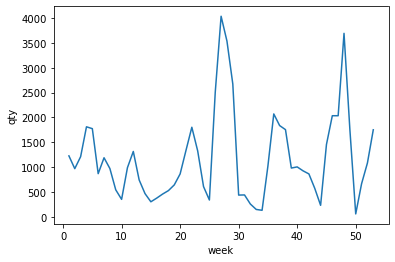

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
# 2015년도 자료만 추출
featuresData = pd.read_csv("../dataset/feature_regression_example.csv")
featuresData2015 = featuresData.loc[ featuresData.YEAR == 2015 ] # 2015년도 자료만 추출
featuresData2015
xValue = list(featuresData2015.WEEK) 
yValue = list(featuresData2015.QTY) 
plt.xlabel("week") # x축 제목
plt.ylabel("qty") # y축 제목
plt.plot(xValue, yValue)

# ../dataset/feature_regression_example.csv
# 2015년도 자료만 활용하여 x축: week 이중축으로 qty, pro_percent를 차트로 그리세요

Text(0, 0.5, 'ax2_value')

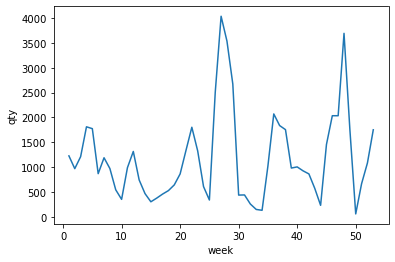

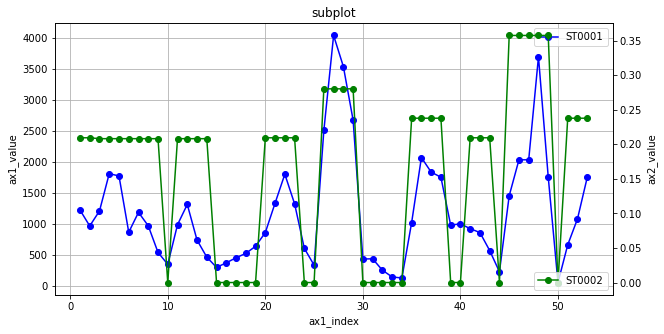

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
# 2015년도 자료만 추출
featuresData = pd.read_csv("../dataset/feature_regression_example.csv")
featuresData2015 = featuresData.loc[ featuresData.YEAR == 2015 ] # 2015년도 자료만 추출
featuresData2015
xValue = list(featuresData2015.WEEK) # X축 컬럼
yValue = list(featuresData2015.QTY)  # Y축 컬럼
plt.xlabel("week") # x축 제목
plt.ylabel("qty") # y축 제목
plt.plot(xValue, yValue)
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,1,1)
ax1.plot(xValue,yValue, 'bo-',lw=1.5, label = 'ST0001')
ax1.grid(True)
ax1.legend(loc=0)
ax1.set_ylabel('ax1_value')
ax1.set_xlabel('ax1_index')
plt.title('subplot')
y2 = list(featuresData2015.PRO_PERCENT) # Y축 두 번째에 쓰일 컬럼
ax2 = ax1.twinx() # ax1의 x축을 공유(이중 축)
ax2.plot(xValue,y2, 'go-', lw=1.5, label='ST0002')
ax2.legend(loc=4)
ax2.set_ylabel('ax2_value')

In [48]:
featuresData

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155
...,...,...,...,...,...,...,...,...,...,...,...,...
100,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201648,2016,48,2412,Y,0,Y,0.421888
101,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201649,2016,49,1955,N,4,Y,0.421888
102,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201650,2016,50,1800,N,4,Y,0.352361
103,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201651,2016,51,1173,N,4,Y,0.352361
